In [39]:
from sklearn import datasets
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
breast = datasets.load_breast_cancer()
xtrain , xtest , ytrain , ytest = train_test_split(breast.data , breast.target , test_size = 0.2, random_state = 69)

In [40]:
clf = KNeighborsClassifier()
clf.fit(xtrain, ytrain)
clf.score(xtest, ytest)

0.9210526315789473

In [41]:
x_axis = []
y_axis = []
for i in range (1,26,2):   #odd numbers from 1 to 25
    clf = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(clf,xtrain,ytrain)
    print(i , score.mean())
    x_axis.append(i)
    y_axis.append(score.mean())

1 0.9296703296703297
3 0.9406593406593406
5 0.9472527472527472
7 0.9428571428571428
9 0.9362637362637363
11 0.9340659340659341
13 0.9340659340659341
15 0.9340659340659341
17 0.9340659340659341
19 0.9274725274725275
21 0.9252747252747253
23 0.9252747252747253
25 0.9252747252747253


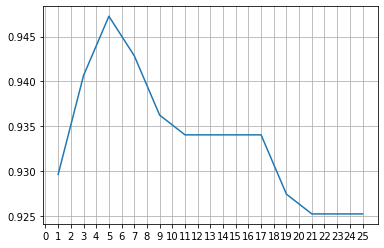

In [42]:
import matplotlib.pyplot as plt
plt.plot(x_axis,y_axis)
plt.xticks(np.arange(0,26,1))
plt.grid()
plt.show()

In [43]:
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(xtrain, ytrain)
clf.score(xtest, ytest)

0.9210526315789473

In [51]:
from collections import Counter

In [52]:
a = [1,2,5,1,2,1,1,1,2,0,1,1]
Counter(a)

Counter({1: 7, 2: 3, 5: 1, 0: 1})

In [53]:
Counter(a).most_common()

[(1, 7), (2, 3), (5, 1), (0, 1)]

In [54]:
Counter(a).most_common(2)

[(1, 7), (2, 3)]

In [55]:
Counter(a).most_common(1)

[(1, 7)]

In [56]:
Counter(a).most_common(1)[0][0]

1

## Implementation 

In [63]:
def train(x,y):
    return

def predict_one_point(x_train, y_train, x_test_point, k):
    distances = []
    for i in range(len(x_train)):
        distance = ((x_train[i, :] - x_test_point)**2).sum()
        distances.append([distance, i])
    distances = sorted(distances)
    targets = []
    for i in range(k):
        index_of_training_data = distances[i][1]
        targets.append(y_train[index_of_training_data])
    return Counter(targets).most_common(1)[0][0]

def predict(x_train, y_train, x_test,k):
    predictions = []
    for x_test_point in x_test:
        predictions.append(predict_one_point(x_train, y_train, x_test_point, k))
    return predictions

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
y_pred = predict(xtrain,ytrain,xtest,5)
accuracy_score(ytest,y_pred)

0.9210526315789473

#### We are getting exactly the same score as above using sklearn